## This file is to experiment with different algorithms on mfccData

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
from sklearn import preprocessing
from sklearn.svm import SVC
import sklearn.naive_bayes
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import BernoulliRBM
from matplotlib.colors import ListedColormap

In [3]:
#loading the data
X = np.load('..\\..\\Data\\VoiceData\\mfccData\\X_mfcc.npy')
Y = np.load('..\\..\\Data\\VoiceData\\mfccData\\Y.npy')

In [4]:
#converting y into labels
le = preprocessing.LabelEncoder()
le.fit(Y)
y = le.transform(Y)
Y = Y.astype(bool);
X = X.reshape((X.shape[0],-1))

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, le.transform(Y), test_size=0.1, random_state=42)

In [48]:
#lets apply naive bayes algorithm on this one
GNBclf = sklearn.naive_bayes.GaussianNB();
GNBclf.fit(X_train,y_train)
y_pred = GNBclf.predict(X_test);

In [51]:
y_prob = GNBclf.predict_proba(X_test);
print('AUC ROC:',roc_auc_score(y_test,y_prob[:,1]))
print('AUC PR:',average_precision_score(y_test,y_prob[:,1]))
print('F1:',f1_score(y_test,y_pred))

AUC ROC: 0.6944674465706027
AUC PR: 0.6929126267038789
F1: 0.5104872539528881


In [52]:
BNBclf = sklearn.naive_bayes.BernoulliNB();
BNBclf.fit(X_train,y_train)
y_pred = BNBclf.predict(X_test);

In [56]:
y_prob = BNBclf.predict_proba(X_test);
print('AUC ROC:',roc_auc_score(y_test,y_prob[:,1]))
print('AUC PR:',average_precision_score(y_test,y_prob[:,1]))
print('F1:',f1_score(y_test,y_pred))

AUC ROC: 0.6336038207557122
AUC PR: 0.6620601428197567
F1: 0.5742516710258646


In [6]:
rfclf = RandomForestClassifier(n_estimators = 200, max_depth = 400, random_state = 42, max_features = 'log2')
rfclf.fit(X_train,y_train)
y_pred = rfclf.predict(X_test);

In [7]:
#the output in comments of this block was predicted with n_estimators = 200 and max_depth= 400, max_features = 'log2'
y_prob = rfclf.predict_proba(X_test);
print('AUC ROC:',roc_auc_score(y_test,y_prob[:,1]))
print('AUC PR:',average_precision_score(y_test,y_prob[:,1]))
print('F1:',f1_score(y_test,y_pred))
#AUC ROC: 0.8637570149159266
#AUC PR: 0.8872600775738488
#F1: 0.8076199435559737
rfclf.score(X_test,y_test)

AUC ROC: 0.8637570149159266
AUC PR: 0.8872600775738488
F1: 0.8076199435559737


0.7671505835468261

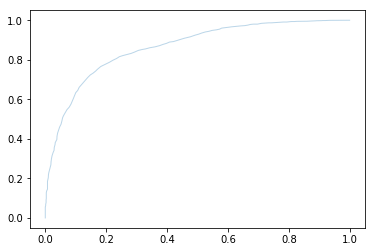

In [9]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test,y_prob[:,1])
roc_auc = auc(fpr,tpr)
plt.plot(fpr,tpr,lw=1,alpha=0.3,label='ROC (AUC = %0.2f)'%roc_auc)

In [95]:
#boosting our rfclf classifier
adaclf = AdaBoostClassifier(base_estimator = rfclf, random_state = None)
adaclf.fit(X_train,y_train)
y_pred = adaclf.predict(X_test);
y_prob = adaclf.predict_proba(X_test);
print('AUC ROC:',roc_auc_score(y_test,y_prob[:,1]))
print('AUC PR:',average_precision_score(y_test,y_prob[:,1]))
print('F1:',f1_score(y_test,y_pred))

AUC ROC: 0.8535764303730253
AUC PR: 0.8824133199275481
F1: 0.8145253964605838


In [96]:
#kfolding adaboost and decision tree
kfolds = 10;
skf = StratifiedKFold(n_splits = kfolds, shuffle = True);
roc = 0;
pr = 0;
f1 = 0;
for train_index, test_index in skf.split(X, le.transform(Y)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    rfclf = RandomForestClassifier(n_estimators = 150, max_depth = 400, random_state = 42, max_features = 'log2')
    adaclf = AdaBoostClassifier(base_estimator = rfclf, random_state = 42)
    adaclf.fit(X_train,y_train)
    y_pred = adaclf.predict(X_test);
    y_prob = adaclf.predict_proba(X_test);
    roc = roc + roc_auc_score(y_test,y_prob[:,1]);
    pr = pr + average_precision_score(y_test,y_prob[:,1]);
    f1 = f1 + f1_score(y_test,y_pred);
roc = roc/kfolds;
pr = pr/kfolds;
f1 = f1/kfolds;
print('AUC ROC:',roc)
print('AUC PR:',pr)
print('F1:',f1)

#previous result of k fold with k = 10 and rfclf with n_estimators = 150, max_depth = 400, max_features = log2
#AUC ROC: 0.86269924001062
#AUC PR: 0.8920467785657482
#F1: 0.8182566355919366

AUC ROC: 0.8625592725341829
AUC PR: 0.8918363356536256
F1: 0.8185982100388325


In [105]:
#working with decision tree
dsc = DecisionTreeClassifier(max_depth = 10, random_state = 42, max_features = 'log2');
dsc.fit(X_train,y_train)
y_pred = dsc.predict(X_test);
y_prob = dsc.predict_proba(X_test);
print('AUC ROC:',roc_auc_score(y_test,y_prob[:,1]))
print('AUC PR:',average_precision_score(y_test,y_prob[:,1]))
print('F1:',f1_score(y_test,y_pred))

AUC ROC: 0.6789554294437807
AUC PR: 0.7238481881420374
F1: 0.6804123711340206


In [108]:
#working with k neighbours
knn = KNeighborsClassifier(n_neighbors = 10);
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test);
y_prob = knn.predict_proba(X_test);
print('AUC ROC:',roc_auc_score(y_test,y_prob[:,1]))
print('AUC PR:',average_precision_score(y_test,y_prob[:,1]))
print('F1:',f1_score(y_test,y_pred))

AUC ROC: 0.8306426722421346
AUC PR: 0.8571149974638079
F1: 0.7488410144532316


In [110]:
#working with gaussian process classifier
gpclf = GaussianProcessClassifier(RBF(1.0));
gpclf.fit(X_train,y_train)
y_pred = gpclf.predict(X_test);
y_prob = gpclf.predict_proba(X_test);
print('AUC ROC:',roc_auc_score(y_test,y_prob[:,1]))
print('AUC PR:',average_precision_score(y_test,y_prob[:,1]))
print('F1:',f1_score(y_test,y_pred))

AUC ROC: 0.5013440860215054
AUC PR: 0.5770874893131946
F1: 0.0


C:\ProgramData\Anaconda3\envs\mtahir\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [6]:
#working with MLP
mlp = MLPClassifier();
mlp.fit(X_train,y_train)
y_pred = mlp.predict(X_test);
y_prob = mlp.predict_proba(X_test);
print('AUC ROC:',roc_auc_score(y_test,y_prob[:,1]))
print('AUC PR:',average_precision_score(y_test,y_prob[:,1]))
print('F1:',f1_score(y_test,y_pred))

AUC ROC: 0.819147028418321
AUC PR: 0.8495174509218258
F1: 0.7909997680352586


In [8]:
brbm = BernoulliRBM();
brbm.fit(X_train,y_train)
y_prob = brbm.score_samples(X_test);
#y_prob = brbm.predict_proba(X_test);
print('AUC ROC:',roc_auc_score(y_test,y_prob))
print('AUC PR:',average_precision_score(y_test,y_prob))
#print('F1:',f1_score(y_test,y_pred))

AUC ROC: 0.48695153115044615
AUC PR: 0.5580051375603258


## Random Forest Classifier Decision Boundary Drawing

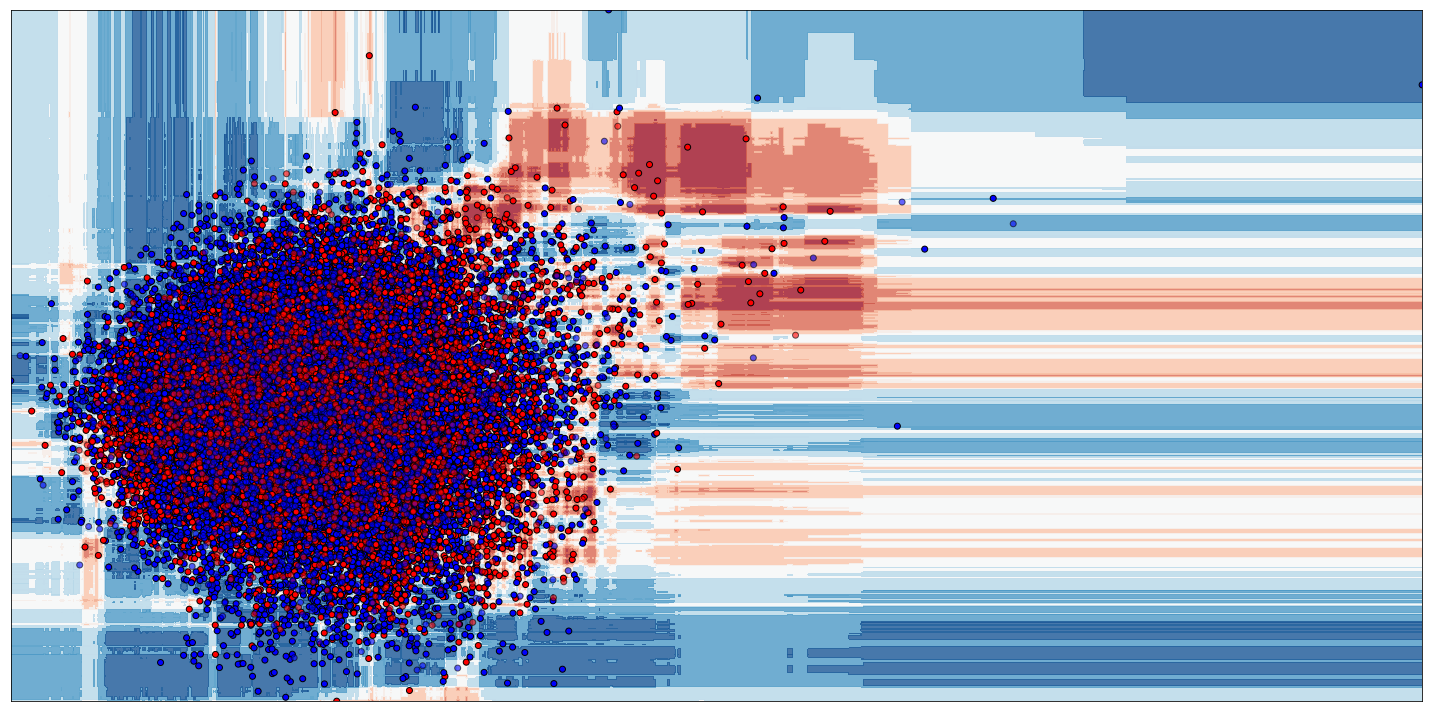

In [17]:
#this cell attempts to visualize the data separation using PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2);
Xpca = pca.fit_transform(X);
X_train, X_test, y_train, y_test = train_test_split(Xpca, le.transform(Y), test_size=0.1, random_state=42)
#making the thing
h = 1;
x_min, x_max = Xpca[:, 0].min() - .5, Xpca[:, 0].max() + .5
y_min, y_max = Xpca[:, 1].min() - .5, Xpca[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

#Z = rfclf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
#Z = Z.reshape(xx.shape)
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
_, ax = plt.subplots(figsize=(20, 10))
ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

# Plot the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
           edgecolors='k')
# Plot the testing points
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
           edgecolors='k', alpha=0.6)

ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
plt.tight_layout()
plt.show()


In [40]:
X_true = X[Y,:];
X_false = X[~Y,:];

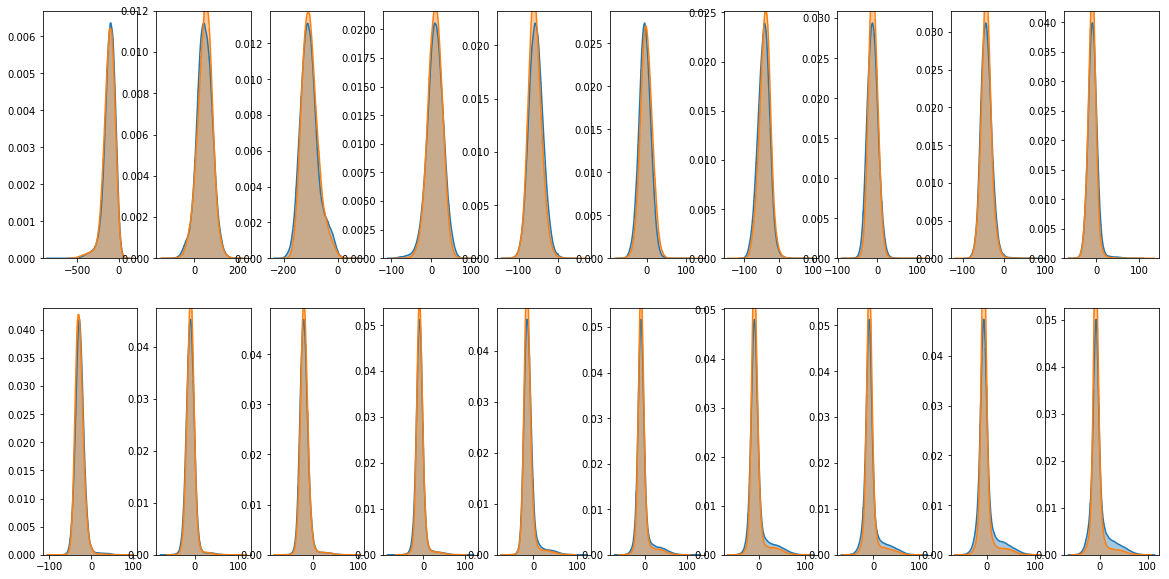

In [85]:
j = 1;
fig = plt.figure(figsize=(20,10));
for i in range(20):
    plt.subplot(2,10,j)
    j = j + 1;
    sns.distplot(np.squeeze(X_true.reshape((-1,20,87))[:,i,:]).reshape(-1))
    #plt.subplot(1,2,2)
    sns.distplot(np.squeeze(X_false.reshape((-1,20,87))[:,i,:]).reshape(-1))
plt.show()

In [86]:
rfclf.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 400,
 'max_features': 'log2',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [89]:
rfclf.predict(X_test)

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [94]:
y_test

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

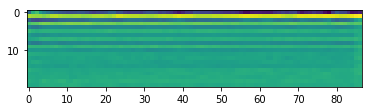

In [97]:
plt.imshow(X_test[0].reshape(20,87))
plt.show()

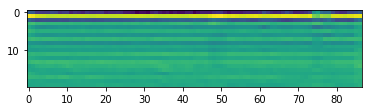

In [96]:
plt.imshow(X_test[2].reshape(20,87))
plt.show()